
[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/d0/ca/4a32e95f1767467f7c461d7d5b4b506faebb1e30e35c1031c1b31cf82846/mediapipe-0.10.18-cp310-cp310-win_amd64.whl.metadata
  Using cached mediapipe-0.10.18-cp310-cp310-win_amd64.whl.metadata (9.9 kB)
  Obtaining dependency information for jax from https://files.pythonhosted.org/packages/62/20/6c57c50c0ccc645fea1895950f1e5cd02f961ee44b3ffe83617fa46b0c1d/jax-0.4.35-py3-none-any.whl.metadata
  Using cached jax-0.4.35-py3-none-any.whl.metadata (22 kB)
  Obtaining dependency information for jaxlib from https://files.pythonhosted.org/packages/6c/a9/b6bdff31e21a485190985dccbdd5ae1130fe2e4af826c83c10ae1d0d14a9/jaxlib-0.4.35-cp310-cp310-win_amd64.whl.metadata
  Using cached jaxlib-0.4.35-cp310-cp310-win_amd64.whl.metadata (1.0 kB)
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/a7/9e/7110d2c5d543ab03b9581dbb1f8e2429863e44e0c9b4960b766f230c1279/ope

In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model_path = '../hand_landmarker.task'

In [3]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [4]:
import cv2

img = cv2.imread("../../resources/stylized-pictures/HC_AW_NM-one_colour/common_edges.jpg")

In [15]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  print(hand_landmarks_list)
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

HandLandmarkerResult(handedness=[], hand_landmarks=[], hand_world_landmarks=[])


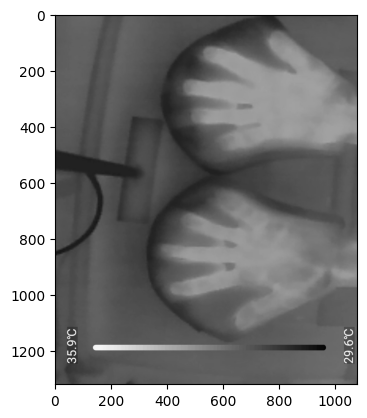

In [8]:
# # STEP 2: Create a HandLandmarker object.
# base_options = python.BaseOptions(model_asset_path=model_path)
# options = vision.HandLandmarkerOptions(
#     base_options=base_options,
#     num_hands=2,
#     min_hand_detection_confidence=0.4,  # Set the hand detection confidence (default is 0.5)
#     min_hand_presence_confidence=0.4  # Set the hand presence confidence (default is 0.5)
# )
# detector = vision.HandLandmarker.create_from_options(options)
# 
# # STEP 3: Load the input image.
# image_path = "../../resources/hand-pictures/frame1.jpg"
# 
# # Read the image as a NumPy array using OpenCV
# image_np = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# if image_np is None:
#     raise FileNotFoundError(f"Image not found: {image_path}")
# 
# # Convert grayscale image to RGB
# image_rgb = cv2.cvtColor(image_np, cv2.COLOR_GRAY2RGB)
# 
# # Convert the RGB image into a Mediapipe Image object
# image_mp = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)
# 
# # Display the input image (optional)
# imshow(image_rgb)
# 
# # STEP 4: Detect hand landmarks from the input image.
# detection_result = detector.detect(image_mp)
# 
# print(detection_result)
# 
# # STEP 5: Process the classification result. Visualize it.
# # Define a function to draw landmarks
# def draw_landmarks_on_image(image_np, detection_result):
#     annotated_image = image_np.copy()
#     for hand_landmarks in detection_result.hand_landmarks:
#         for landmark in hand_landmarks:
#             # Draw each landmark as a circle on the image
#             x, y = int(landmark.x * annotated_image.shape[1]), int(landmark.y * annotated_image.shape[0])
#             cv2.circle(annotated_image, (x, y), radius=5, color=(255, 0, 0), thickness=-1)
#     return annotated_image
# 
# # Annotate the image with landmarks
# annotated_image = draw_landmarks_on_image(image_rgb, detection_result)
# 
# # Convert the annotated image to BGR for OpenCV compatibility and display it
# imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [9]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("../../resources/hand-pictures/frame1.jpg")
imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

AttributeError: 'mediapipe.python._framework_bindings.image.Image' object has no attribute 'shape'

[[NormalizedLandmark(x=0.9142496585845947, y=0.6241987943649292, z=1.356478236402836e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.8769688010215759, y=0.6873247027397156, z=-0.02451571449637413, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7981630563735962, y=0.7308802604675293, z=-0.03595121204853058, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7357282042503357, y=0.7563912868499756, z=-0.047131653875112534, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7045483589172363, y=0.792754054069519, z=-0.05945359915494919, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6704506874084473, y=0.6831803321838379, z=-0.017811749130487442, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5826355218887329, y=0.7153663039207458, z=-0.039444658905267715, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5230779051780701, y=0.7327466011047363, z=-0.06039257347583771, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.47609221935272217, y=0.74525

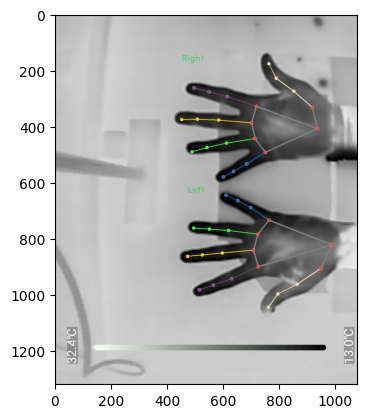

In [16]:

# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       min_hand_detection_confidence=0.4,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("../../resources/hand-pictures/frame15.jpg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [1]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image_from_json(rgb_image, evaluation_result):
  hand_landmarks_list = evaluation_result['landmarks']
  # handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)
  print(hand_landmarks_list)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    # handedness = handedness_list[idx]
    print(hand_landmarks)
    height, width, _ = annotated_image.shape
    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=float(landmark['x']), y=float(landmark['y']), z=0.0) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
   
    x_coordinates = [landmark['x'] for landmark in hand_landmarks]
    y_coordinates = [landmark['y'] for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"Left",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

[[{'x': 0.9166666666666666, 'y': 0.6272727272727273}, {'x': 0.8722222222222222, 'y': 0.6878787878787879}, {'x': 0.7925925925925926, 'y': 0.7303030303030303}, {'x': 0.737037037037037, 'y': 0.7560606060606061}, {'x': 0.6944444444444444, 'y': 0.7954545454545454}, {'x': 0.6666666666666666, 'y': 0.6848484848484848}, {'x': 0.6055555555555555, 'y': 0.6984848484848485}, {'x': 0.5555555555555556, 'y': 0.7227272727272728}, {'x': 0.48703703703703705, 'y': 0.7439393939393939}, {'x': 0.6351851851851852, 'y': 0.6333333333333333}, {'x': 0.5592592592592592, 'y': 0.6409090909090909}, {'x': 0.5, 'y': 0.646969696969697}, {'x': 0.42962962962962964, 'y': 0.6545454545454545}, {'x': 0.6425925925925926, 'y': 0.593939393939394}, {'x': 0.5814814814814815, 'y': 0.5848484848484848}, {'x': 0.5351851851851852, 'y': 0.5712121212121212}, {'x': 0.46111111111111114, 'y': 0.5742424242424242}, {'x': 0.6796296296296296, 'y': 0.546969696969697}, {'x': 0.6407407407407407, 'y': 0.5227272727272727}, {'x': 0.6055555555555555, 

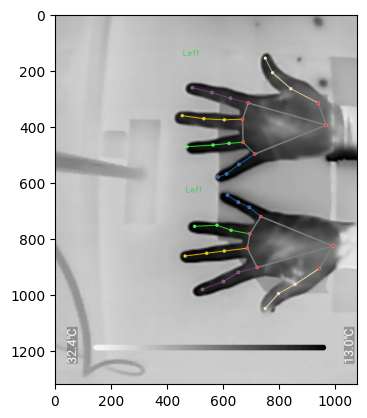

In [63]:
import json

# Example usage
image_path = '../../resources/hand-pictures/frame15.jpg'  # Path to your image
json_file = '../annotating-dataset/landmarks_normalized.json'  # Path to your JSON file

# Draw landmarks from the JSON file
jsonContent = json.load(open(json_file))
annotated_image = draw_landmarks_on_image_from_json(image.numpy_view(), jsonContent)

imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [67]:
import numpy as np

def calculate_distance(prediction, ground_truth):
    """Calculate Euclidean distance between predicted and ground truth points."""
    x_pred, y_pred = prediction
    x_gt, y_gt = ground_truth
    return np.sqrt((x_pred - x_gt) ** 2 + (y_pred - y_gt) ** 2)

def evaluate_landmarks(predictions, evaluation_landmarks):
    """
    Evaluates how close the predictions are to the ground truth landmarks.
    
    Args:
    - predictions: List of predicted landmarks (21 points for each hand)
    - evaluation_landmarks: List of ground truth landmarks (21 points for each hand)
    
    Returns:
    - The average Euclidean error for all points
    """
    total_error = 0
    total_points = 0

    # Iterate through each hand's landmarks in the prediction and evaluation
    for predicted_hand, ground_truth_hand in zip(predictions, evaluation_landmarks):
        for pred_point, gt_point in zip(predicted_hand, ground_truth_hand):
            # Calculate the distance between corresponding points
            error = calculate_distance((pred_point.x, pred_point.y), (gt_point['x'], gt_point['y']))
            total_error += error
            total_points += 1
    
    # Calculate the average error across all points
    average_error = total_error / total_points if total_points else 0
    return average_error




In [68]:
detected_points = detection_result.hand_landmarks
evaluation_points = jsonContent['landmarks']

# Evaluate the detected points
average_error = evaluate_landmarks(detected_points, evaluation_points)
print(f"Average Euclidean error: {average_error:.2f}")

Average Euclidean error: 0.02
